In [25]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load dataset

df_train = pd.read_csv("train.csv")

# Data Preprocessing

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# Counting null values.

print(pd.DataFrame(df_train.isnull().sum()))

               0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2


## Handling Missing Values

### Cabin has a total of 687 missing values.

**Hypothesis**:  We can reasonably assume that all the passengers who are travelling without a personal cabin have missing cabin value.  We can update the missing cabin value as "X".

In [30]:
df_train["Cabin"] = df_train["Cabin"].apply(lambda x: "X" if pd.isnull(x) else x)

### We have 2 missing values in Embarked.

The reasonable approach to handle these would be to fill these using Mode.

In [31]:
df_train.loc[df_train["Embarked"].isnull(), "Embarked"] = df_train["Embarked"].mode()[0]

### We have 177 missing values in Age.

The reasonable approach to fill these would be to fill these using Median based on their passenger class, as passengers from different classes may have different age distributions.

In [32]:
df_train["Age"] = df_train.groupby("Pclass")["Age"].transform(lambda x : x.fillna(x.median()))

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

In [34]:
# Counting Survival Outcomes

df_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [35]:
# Counting Male and Female Passengers

df_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\India\AppData\Local\Temp\ipykernel_4460\1726508239.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Passengers_Per_Class.index, y=Passengers_Per_Class.values, palette="coolwarm")


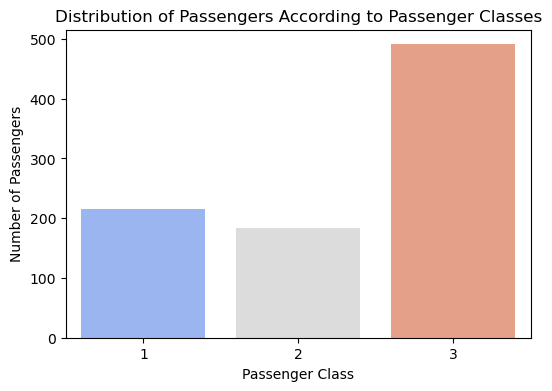

In [50]:
## Number of Passengers according to Passenger Class

Passengers_Per_Class = df_train.groupby("Pclass")["Pclass"].count()

plt.figure(figsize=(6,4))
sns.barplot(x=Passengers_Per_Class.index, y=Passengers_Per_Class.values, palette="coolwarm")
plt.title("Distribution of Passengers According to Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")

plt.show()

### Observations:

+ Class 3 Had the Most Passengers, with approximately **500 individuals**.  This suggests that most Titanic passengers were in **economy class**, likely due to affordability.

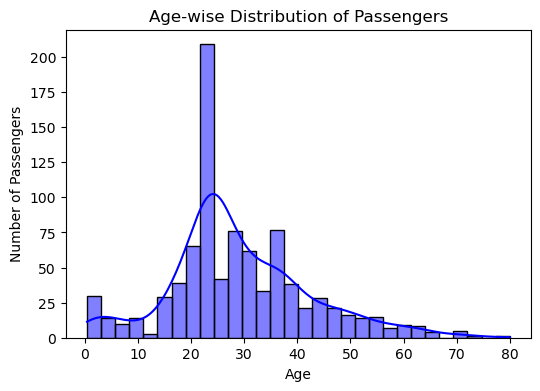

In [53]:
# Age Distribution

plt.figure(figsize=(6,4))
sns.histplot(df_train['Age'], bins=30, kde=True, color="blue")
plt.title("Age-wise Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

### Observations:
+  The highest number of passengers falls within the **20-25 age range**, peaking around 200 passengers.
+  The **distribution is right-skewed**, meaning there were more younger passengers compared to older ones.
+  As age increases beyond 25, the number of passengers **gradually declines**.
+  There are **smaller peaks** around the ages of **30 and 40**, suggesting secondary age groups with relatively higher passenger counts.
+  The number of passengers **significantly drops** after 50 years, with very few individuals above 70.
+  The **density curve overlaying the histogram** provides a smoothed view of the age distribution, confirming the trend.

C:\Users\India\AppData\Local\Temp\ipykernel_4460\4079900381.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


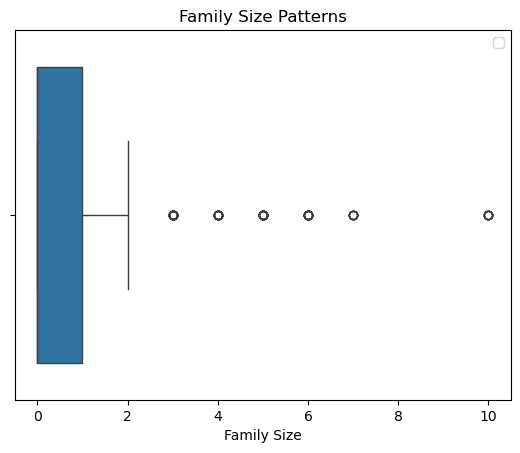

In [57]:
# Analyzing Family Size Patterns.

df["FamilySize"] = df_train["SibSp"] + df_train["Parch"]

sns.boxplot(x="FamilySize", data=df)

plt.title("Family Size Patterns")
plt.xlabel("Family Size")
plt.legend()

plt.show()

### Observations:
+  **Most passengers traveled alone or in small families:** The majority of family sizes are between **0 and 2**, meaning most passengers had **no family aboard** or were accompanied by only one or two relatives.
+  **The median family size is around 1:** The central line in the box indicates the typical family size.
+  **Presence of outliers:** Some passengers had **large families**, ranging from 4 to 10 members. These larger family sizes appear as **individual points beyond the whiskers**, suggesting they were relatively rare.
+  **Skewed towards smaller family sizes:** Since the box and whiskers are concentrated toward the lower end of the scale, it confirms that most passengers were either solo travelers or in small family units.

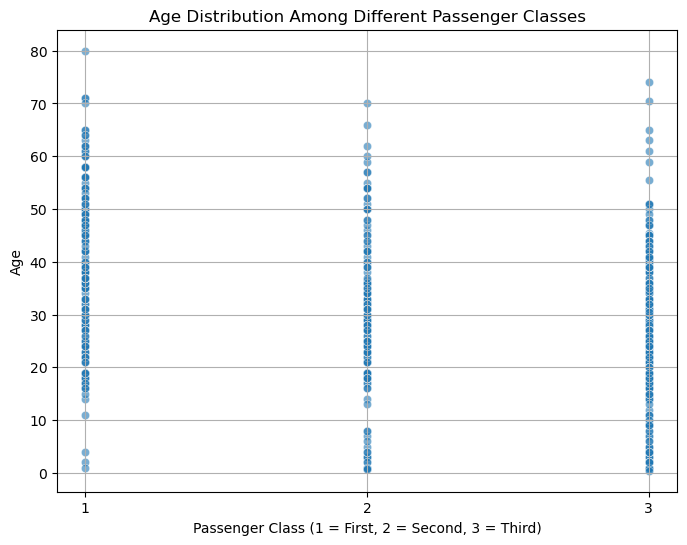

In [59]:
# Analyzing age distributions across passenger classes

plt.figure(figsize=(8,6))

sns.scatterplot(x=df_train["Pclass"], y=df_train["Age"], alpha=0.6)

plt.xticks([1,2,3])

plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Age")
plt.title("Age Distribution Among Different Passenger Classes")
plt.grid("True")
plt.show()

### Observations:
+  **Age Range Across Classes:** Passengers from all three classes exhibit a wide range of ages, spanning from infants to elderly individuals.
+  **Concentration of Younger Passengers:** The majority of passengers appear to be under 40 years old, suggesting a higher number of younger individuals on board.
+  **Presence of Elderly Outliers:** There are a few passengers aged **70 and above**, scattered across different classes, indicating that elderly travelers were not restricted to a particular class.
+  **First-Class Passenger Age Diversity:** First-class (`Pclass 1`) passengers have a fairly even age distribution, from infants to senior travelers.
+  **Third-Class Younger Passenger Trend:** Third-class (`Pclass 3`) seems to have a concentration of younger passengers, possibly indicating that families and younger individuals predominantly occupied this class.

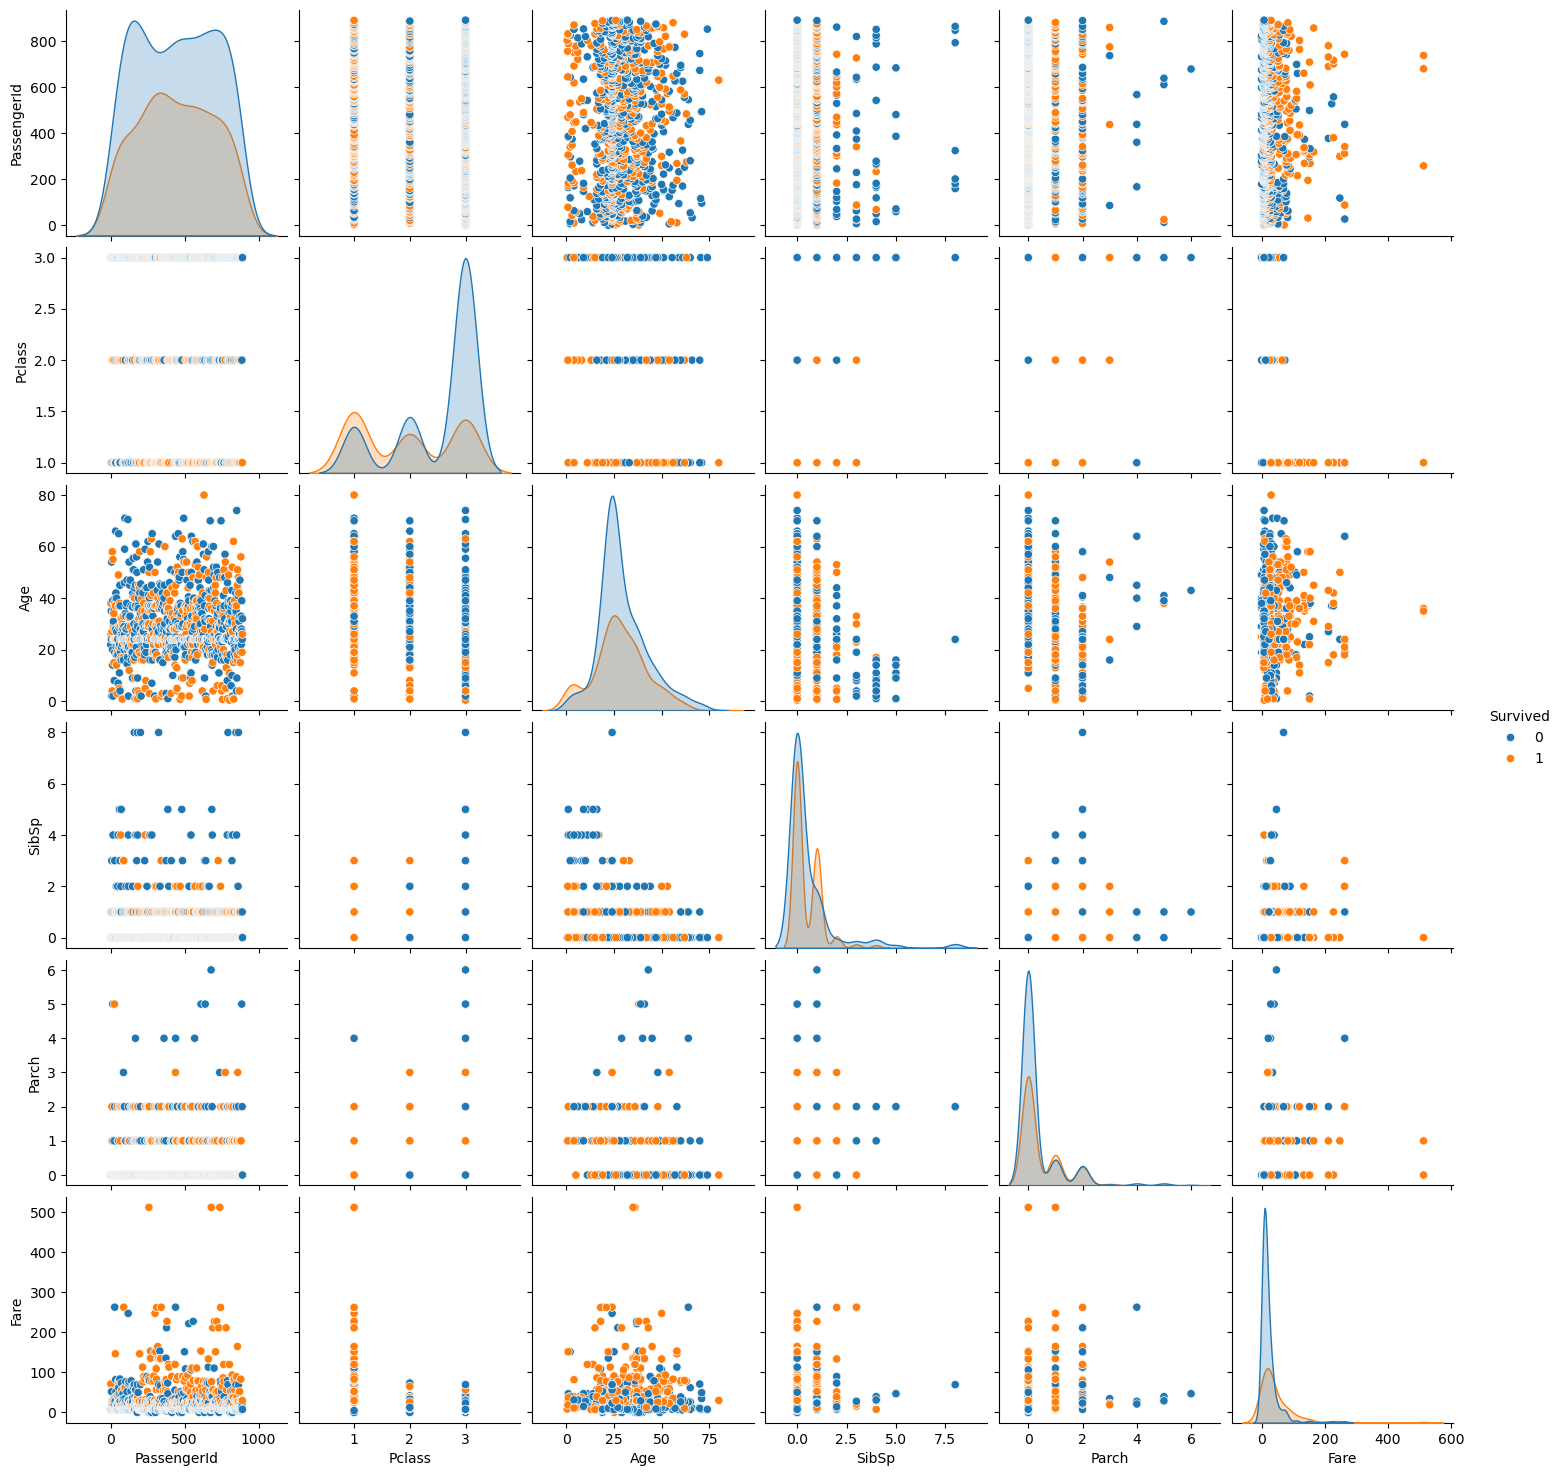

In [52]:
# Comparing survival rates across age, fare, and passenger class.

sns.pairplot(df_train, hue="Survived")

### Observations:
+ **Pclass (Passenger Class):** First-class passengers had significantly higher survival rates compared to third-class passengers.
+ **Age:** Younger passengers, especially children, had better survival rates.
+ **SibSp (Number of Siblings/Spouses Aboard):** Passengers traveling with one or two family members had better chances of survival than those traveling alone or with a large family group.
+ **Parch (Number of Parents/Children Aboard):** Similarly, having a small family aboard (1-2 members) seemed to improve survival chances.
+ **Fare:** Higher ticket fares are associated with higher survival rates, indicating that wealthier passengers (likely first-class) had an advantage.

## Correlation Analysis between Survival, Passenger Class, Sex, Age, Family Size and Fare.

C:\Users\India\AppData\Local\Temp\ipykernel_4460\1776553952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["Sex"] = df_numeric["Sex"].apply(lambda x : 1 if x == "female" else 0)


<Axes: >

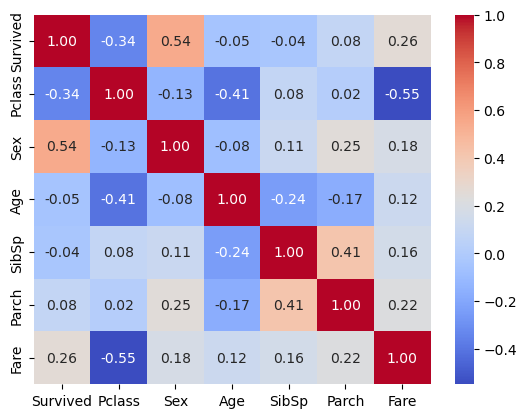

In [40]:
# Separate numerical values, will change sex to 0 for Male, 1 for female.

df_numeric = df_train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]

# Convert sex to numerical values.

df_numeric["Sex"] = df_numeric["Sex"].apply(lambda x : 1 if x == "female" else 0)

Corr_Matrix = df_numeric.corr()

sns.heatmap(Corr_Matrix, annot=True, cmap="coolwarm", fmt=".2f")

### Observations:

**Survival Correlations:**

+  There is a **moderate positive correlation with Sex (~0.54)**, indicating that female passengers had a significantly higher chance of survival.
+  A **negative correlation with Pclass (~-0.34)** suggests that passengers in lower classes were less likely to survive.
+  **Fare (~0.26) has a weak positive correlation** with survival, meaning passengers who paid higher fares had a slightly better chance of survival.

# Final Takeaways:
+  ## First-class passengers had better survival chances.
+  ## Women had a significantly higher likelihood of surviving.
+  ## Younger individuals were more common on board, but survival was not necessarily age-dependent.
+  ## Ticket price played a notable role, as passengers who paid higher fares had better outcomes.